In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [6]:
df = pd.read_excel ('Applied_Volt_vs_Count_No_Increasing.xlsx')
print(df)

   No. of Obs  Applied Voltage (V) Counts Unnamed: 3 Unnamed: 4  Avg. Counts  \
0         (n)                  NaN    1st        2nd        3rd          NaN   
1           1                405.0      0          0          0     0.000000   
2           2                415.0    100         98        109   102.333333   
3           3                425.0    117        118        138   124.333333   
4           4                435.0    108        123        105   112.000000   
5           5                445.0    145        122        121   129.333333   
6           6                455.0    128        121        117   122.000000   
7           7                465.0    117        116        113   115.333333   
8           8                475.0    112        111        126   116.333333   
9           9                485.0    132        137        109   126.000000   
10         10                495.0    141        109        135   128.333333   
11         11                505.0    11

In [14]:
app_volt = df["Applied Voltage (V)"][1::]
print(app_volt)
avg_count= df["Avg. Counts"][1::]; error = df["Error"][1::]
print(avg_count)
def f(x,A,B):
    return A*x+B
para, pcov= curve_fit(f,app_volt[1::],avg_count[1::])

1     405.0
2     415.0
3     425.0
4     435.0
5     445.0
6     455.0
7     465.0
8     475.0
9     485.0
10    495.0
11    505.0
Name: Applied Voltage (V), dtype: float64
1       0.000000
2     102.333333
3     124.333333
4     112.000000
5     129.333333
6     122.000000
7     115.333333
8     116.333333
9     126.000000
10    128.333333
11    112.000000
Name: Avg. Counts, dtype: float64


In [15]:
cal_f = [0,102.3,115.3,116.6,117.6,118.4,119.2,120,120.9,121.8,122.5]
f_c = interp1d(app_volt,cal_f,kind='cubic')
f_c(415)

array(102.3)

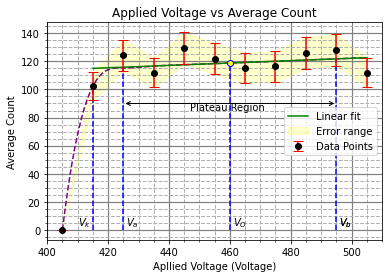

In [64]:
array = np.linspace(app_volt[2],app_volt[len(app_volt)],num=100)
array1 = np.linspace(405,505,num=100)
pp = f(array,para[0],para[1])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([415,415],[0,102.33],color="Blue",ls="--")
ax.plot([425,425],[0,f_c(425)],color="Blue",ls="--")
ax.plot([460,460],[0,f_c(460)],color="Blue",ls="--")
ax.plot([495,495],[0,f_c(495)],color="Blue",ls="--")
ax.plot(array1,f_c(array1),ls='--',color = "Purple")
ax.plot(array,pp,color = "Green",label="Linear fit")
ax.errorbar(app_volt,avg_count,yerr=error, fmt = "o", color = "Black", ecolor = "Red", capsize=5,label="Data Points")
ax.fill_between(app_volt,avg_count-error,avg_count+error,alpha=0.2,label="Error range",color="Yellow")
ax.grid(which = 'major',color="Grey",linestyle = "-", linewidth="1.2")
ax.grid(which = "minor",linestyle = "--", linewidth="1")
ax.minorticks_on()
ax.legend()
ax.annotate("$V_k$",xy=(415,0),xytext=(410,3))
ax.annotate("$V_a$",xy=(425,0),xytext=(426,3))
ax.annotate("$V_b$",xy=(495,0),xytext=(496,3))
ax.annotate("$V_b$",xy=(495,0),xytext=(496,3))
ax.annotate("$V_O$",xy=(460,0),xytext=(461,3))
ax.annotate("",xy=(495,90),xytext=(425,90),arrowprops=dict(arrowstyle="<->"))
ax.annotate("Plateau Region",xy=(455,85),xytext=(447,85))
ax.plot(460,f_c(460),marker="o",markeredgecolor="Blue",markerfacecolor="Yellow")
plt.title("Applied Voltage vs Average Count")
plt.xlabel("Apllied Voltage (Voltage)")
plt.ylabel("Average Count")
plt.savefig("App_Avg.pdf",bbox_inches='tight',dpi=400)
plt.show()